In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

In [2]:
# load dataset
data = pd.read_csv("auto-mpg.data-original", delim_whitespace = True, header = None)

In [3]:
# Sample the data
data.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [4]:
# get shape of data
number_of_nan = sum(pd.isnull(data).sum()) # get number of nan values
print("The Shape of the data: {} x {}".format(data.shape[0], data.shape[1]))
print("Number of NaN values: {}".format(number_of_nan))
data_dropna = data.dropna()

The Shape of the data: 406 x 9
Number of NaN values: 14


In [5]:
X = data_dropna.iloc[:, 1:9] # Last row is text of vehicle type
Y = data_dropna.iloc[:, 0]
print("The Shape of the data when NaN is removed: {} x {}".format(data_dropna.shape[0], data_dropna.shape[1]))

The Shape of the data when NaN is removed: 392 x 9


In [12]:
# Converting labels to integer values
le = preprocessing.LabelEncoder()
labels = X.iloc[:, 7]
le.fit(labels)
X.iloc[:, 7] = le.transform(labels)

In [13]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(X,Y)

0.82290036819864898

In [16]:
R2 = linreg_model.score(X,Y)
print("The Rsquared score is: {}".format(R2))

The Rsquared score is: 0.822900368198649


In [21]:
linreg_model.predict(X)

array([ 14.76129184,  13.75013927,  15.6760163 ,  14.71982996,
        15.12997756,  10.83176106,  10.50872584,  11.13760307,
        10.73423581,  12.76043158,  15.30518406,  14.51768652,
        14.47369579,  18.7760057 ,  24.36028819,  19.35869749,
        18.97841878,  20.97101851,  25.06103882,  27.53365805,
        21.14258455,  21.67221208,  23.00324544,  22.72879487,
        19.87220607,   7.65726629,   8.23403253,   8.28971297,
         6.58105755,  25.8150285 ,  23.14493188,  25.96431337,
        21.06370715,  16.56819587,  17.23074162,  18.00199394,
        16.99154089,  11.22211415,  11.03874663,  12.23563359,
        12.23651858,   6.93750047,   8.9079435 ,   6.67003661,
        19.3312511 ,  22.78182901,  18.18860764,  18.95173231,
        23.43554083,  25.26890138,  25.62829044,  25.04236121,
        28.9842846 ,  29.23271216,  27.95644686,  25.46122807,
        26.5209712 ,  24.36598349,  26.45572267,  23.28592182,
        24.25865601,  11.549193  ,  12.35050584,  12.77

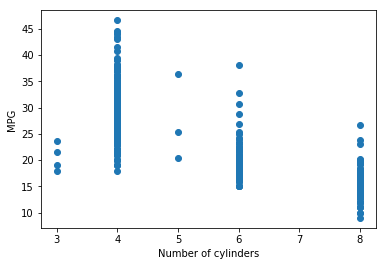

In [8]:
plt.scatter(X.iloc[:,0], Y)
plt.xlabel("Number of cylinders")
plt.ylabel("MPG")
plt.show()

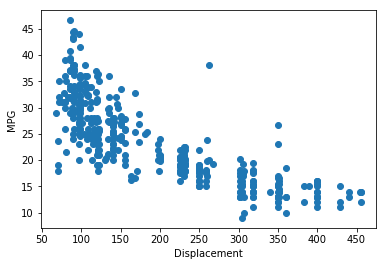

In [151]:
plt.scatter(X.iloc[:,1], Y)
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

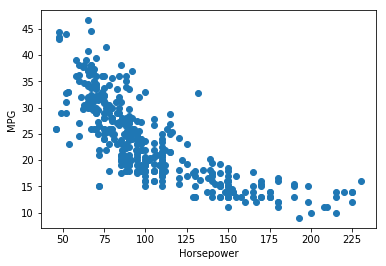

In [26]:
plt.scatter(X.iloc[:,2], Y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

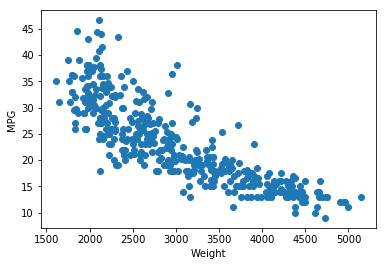

In [29]:
plt.scatter(X.iloc[:,3], Y)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

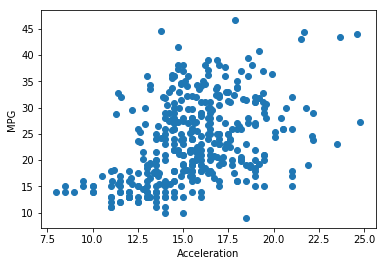

In [30]:
plt.scatter(X.iloc[:,4], Y)
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.show()

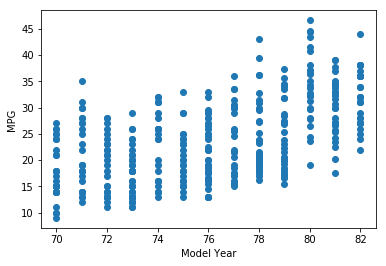

In [31]:
plt.scatter(X.iloc[:,5], Y)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()

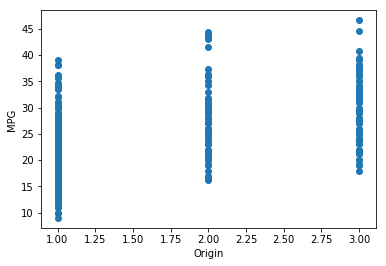

In [32]:
plt.scatter(X.iloc[:,6], Y)
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

In [1]:
wefwefawef 

NameError: name 'wefwefawef' is not defined